# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing all the required libraries

In [2]:
testdata = pd.read_csv("C:\\Users\\rohit\\OneDrive\\Desktop\\Sales Prediction\\Data\\Advertising.csv")

In [4]:
testdata.head()
#Here, we can see the cost of advertisement for TV, Radio and Newspapers and the Sales it led to.

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
testdata.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
testdata.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

# Null Validation

In [7]:
testdata.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
#We can see that there are no Null values
#this is a good thing as at the very least, the data is complete.

# Data Visualization

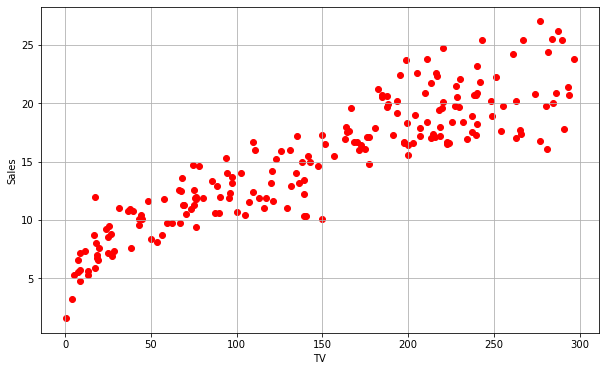

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(testdata['TV'], testdata['Sales'], color='Red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.show()
#The following scatter plot is to see how "Sales" varies with "TV".
#As the scatterplot suggests, the relation between sales and TV advertisement cost is somewhat linear.

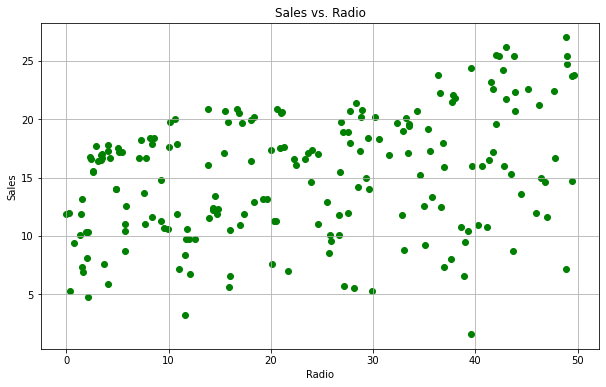

In [12]:
#Now we plot Sales vs Radio
plt.figure(figsize=(10, 6))
plt.scatter(testdata['Radio'], testdata['Sales'], color='green')
plt.title('Sales vs. Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

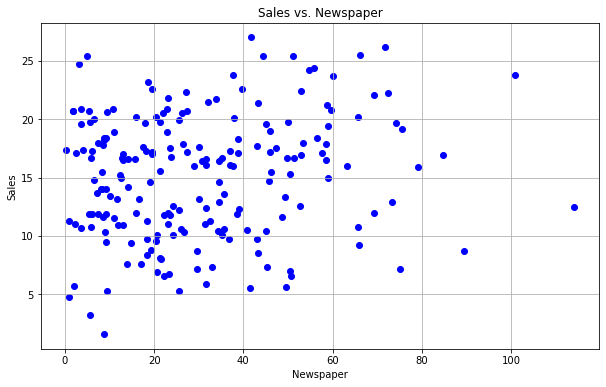

In [13]:
# And finally Sales vs Newspapers
plt.figure(figsize=(10, 6))
plt.scatter(testdata['Newspaper'], testdata['Sales'], color='Blue')  # Scatter plot
plt.title('Sales vs. Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.grid(True)
plt.show()
#Contrary to TV advertisement cost, the cost of newspaper and Radio advertisement have a non linear and sort of undefined relationship with sales.

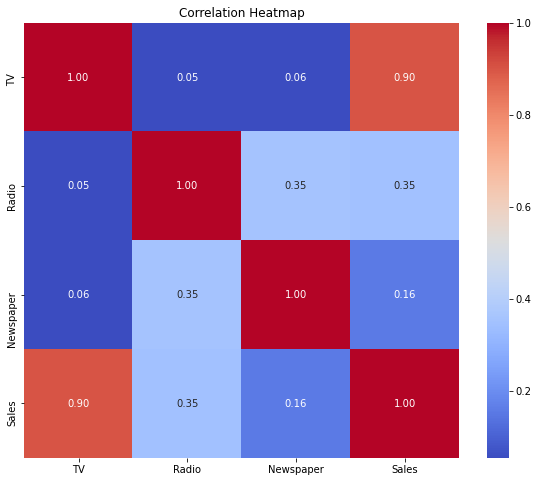

In [15]:
# Calculate the correlation matrix
correlation_matrix = testdata[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
#The heatmap will contain annotations (correlation values), will be in coolwarm format of colors (cool/blue meaning low correlation and warm/red meaning high correlation) and will display the correlation value upto 2 decimal points.
plt.title('Correlation Heatmap')
plt.show()

In [16]:
#From the heatmap we can see that Sales and TV ad cost are highly related (0.9) whereas the correlation with Newspaper and Rdio advertisement cost is low.
#Another thing to note is none of the correlation values are negative which indicates that the sales will only increase after advertisement.
#This is a sign of good advertising as well as non-corrupt data.

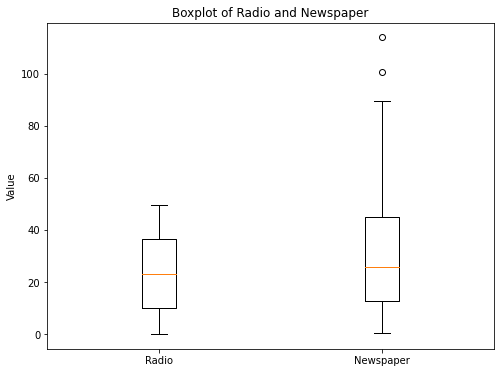

In [18]:
#Now we plot the boxplots to see if there are any outliers present in the data.
columns_to_plot = ['Radio', 'Newspaper']
plt.figure(figsize=(8, 6))
plt.boxplot(testdata[columns_to_plot].values, labels=columns_to_plot)
plt.title('Boxplot of Radio and Newspaper')
plt.ylabel('Value')
plt.show()
#The plot below shows that there are no outliers in the Radio advertisement cost, however there are 2 in the Newspaper advertisement cost.

# Training the model

In [51]:
predictors = testdata.drop(['Sales'], axis = 1)
predictors
pred1 = testdata['TV']
pred1 = np.array(pred1).reshape(-1, 1) #reshaping is required to it can be fit into the model
pred1

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [52]:
target = testdata['Sales']
target
pred1 = np.array(pred1).reshape(-1, 1)
target = np.array(target)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors,target,test_size=0.33, random_state=0)

In [39]:
x_train

,TV,Radio,Newspaper
54,262.7,28.8,15.9
163,163.5,36.8,7.4
51,100.4,9.6,3.6
86,76.3,27.5,16.0
139,184.9,43.9,1.7
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [40]:
y_train

54     20.2
163    18.0
51     10.7
86     12.0
139    20.7
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 134, dtype: float64

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)
#An accuracy of 86.7% is considered decent. We now try to see how accurate the model is if we provide it with only the TV advertisement costs.

R-squared: 0.8666377629513968


In [56]:
from sklearn.model_selection import train_test_split
u_train, u_test, v_train, v_test = train_test_split(pred1,target,test_size=0.33, random_state=0)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_reg = LinearRegression()
linear_reg.fit(u_train, v_train)
v_pred = linear_reg.predict(u_test)
r_squared = r2_score(v_test, v_pred)
print('R-squared:', r_squared)
#As we can see, the accuracy in this case is lower.

R-squared: 0.8078449325024045


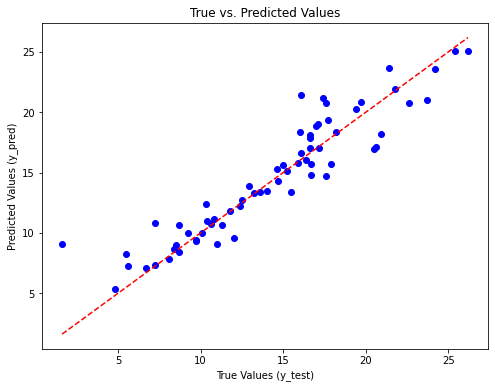

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('True vs. Predicted Values')
plt.show()
#Below is the variation of predicted result with actual values.

In [58]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso_reg = Lasso(alpha=1.0)  #Regularization strength
lasso_reg.fit(x_train, y_train)
y_pred2 = lasso_reg.predict(x_test)
r_squared = r2_score(y_test, y_pred2)
print('R-squared:', r_squared)
#we get a neglegible increase in accuracy when we use Lasso regressio instead of linear regression. Lasso helps us to prevent overfitting by adding regularization terms to the loss function.

R-squared: 0.8679820339272633
